# Final Project
## Qidan Wang
### Repsonses of vegetation growth to ENSO in Qinghai-Tibet Plateau, China

Regional-scale normalized difference vegetation index (NDVI) derived from satellite ovservations and gridded climate data were used to explore potential responses of vegetation growth in Qinghai-Tibet Plateau (QTP) to ENSO (interannual climate variability) of the period from 1982 to 2006 (25 years). There were previous studies focusing more on the impact of PDO on QTP NDVI, however, few studies explored how NDVI respones to ENSO. This study tries to find the potential relationship between NDVI and ENSO, and try to analyze its inherent mechanisms with the consideration of regional precipitaion and temperature. 

### Data Source
1) El Nino related data: ONI (NOAA)
http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

2) Vegetation growth data: NDVI (IRI GIMMS NDVI (15d, 8km))

3) QTP Climate related data: Precipitation and Temperature data ((China Meteorological Forcing Dataset), mat.)

4) CN corrected borders for map
https://gmt-china.org/datas/CN-border-La.dat

### First, let's take a look at where Qinghai-Tibet Plateau it is! Our research area!!

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
## only aimming to hightling our general research area in a pretty fancy way!
lon = np.linspace(75, 104, 374)
lat = np.linspace(39, 26, 166)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

Text(0.5,1,'Qinghai-Tibet Plateau general locations on the map of China')

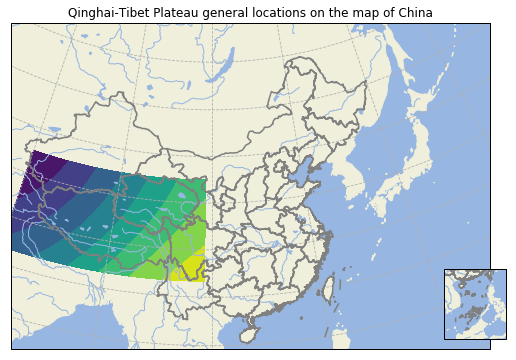

In [4]:
##load data from http://gmt-china.org/datas/CN-border-La.dat
## Since origin data are seperated by '>', we should cut it into blocks according to '>'and then load them to numpy.
with open('CN-border-La.dat') as CNblt:
    data_lat = CNblt.read()
    blocks=[]
    for blt in data_lat.split('>'):
        if len(blt)>0:
            blocks.append(blt)
    
    borders=[]
    for block in blocks:
        borders.append(np.fromstring(block, dtype=float, sep=' '))
    
##Begin plotting maps
fig = plt.figure(figsize=(10, 6))
# Set projection and plot the main figure
ax = plt.axes(projection=ccrs.LambertConformal(central_latitude=90, central_longitude=105))
# Add ocean, land, rivers and lakes with scale of 50m
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))

# Plot border lines
for line in borders:
    ax.plot(line[0::2], line[1::2], '-', color='gray',transform=ccrs.Geodetic())
# Plot gridlines
ax.gridlines(linestyle='--')
# Set figure extent
ax.set_extent([80, 140, 15, 55])

# Plot South China Sea
sub_ax = fig.add_axes([0.75, 0.15, 0.15, 0.16],
                      projection=ccrs.LambertConformal(central_latitude=90,central_longitude=115))
sub_ax.add_feature(cfeature.OCEAN.with_scale('50m'))
sub_ax.add_feature(cfeature.LAND.with_scale('50m'))
sub_ax.add_feature(cfeature.RIVERS.with_scale('50m'))
sub_ax.add_feature(cfeature.LAKES.with_scale('50m'))
# Plot border lines
for line in borders:
    sub_ax.plot(line[0::2], line[1::2], '-', color='gray',
                transform=ccrs.Geodetic())
# Set figure extent
sub_ax.set_extent([105, 125, 0, 25])

ax.contourf(lon2d,lat2d,data,transform=ccrs.PlateCarree())
ax.set_title('Qinghai-Tibet Plateau general locations on the map of China')

### Access to ONI data

In [5]:
! wget http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

--2018-12-05 23:38:24--  http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.19
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/plain]
Saving to: ‘oni.ascii.txt.2’

oni.ascii.txt.2     100%[===================>]  20.19K  --.-KB/s    in 0.03s   

2018-12-05 23:38:24 (750 KB/s) - ‘oni.ascii.txt.2’ saved [20675/20675]



In [6]:
nina34 = pd.read_csv('oni.ascii.txt',sep='\s+')
## Since we only have prcp & temp data to 2006, and for further analysis, we make each set of data from 1982~2006
nina34=nina34[(nina34.YR>=1982) & (nina34.YR<=2006)]
nina34.head()

,SEAS,YR,TOTAL,ANOM
384,DJF,1982,26.56,-0.05
385,JFM,1982,26.90,0.07
386,FMA,1982,27.35,0.19
387,MAM,1982,27.95,0.47
388,AMJ,1982,28.23,0.66


In [7]:
nina34=nina34.set_index('YR')
nina34.head()

,SEAS,TOTAL,ANOM
YR,,,
1982,DJF,26.56,-0.05
1982,JFM,26.90,0.07
1982,FMA,27.35,0.19
1982,MAM,27.95,0.47
1982,AMJ,28.23,0.66


### Plot SSTa (ONI) to have a general pattern of how interannul variability looks like?

Text(0.5,1,'Interannual variations (ENSO) during the period from 1982 to 2006')

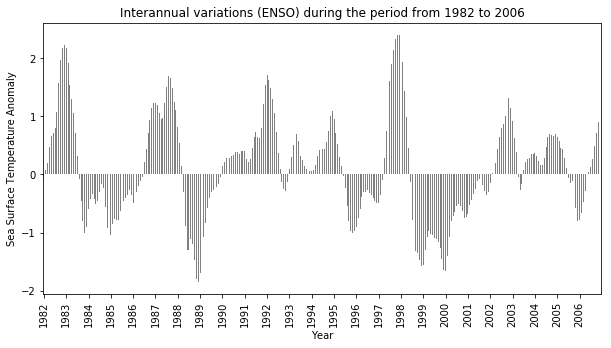

In [8]:
fig,ax=plt.subplots(figsize=(10,5))
nina34.ANOM.plot(kind='bar',ax=ax,color='grey')

## Since the ANOM data are calculated by moving mean and there could be more than ten data within each year, 
## we have to get ticks to make x-axis more clear
ticks = ax.get_xticks()
ax.set_xticklabels(np.arange(1982,2007,1))
ax.set_xticks(ticks[0:-1:12])
ax.set_xlabel('Year')
ax.set_ylabel('Sea Surface Temperature Anomaly')
ax.set_title('Interannual variations (ENSO) during the period from 1982 to 2006')

### Select DJF to see how it makes impact on NDVI in next year during growing season 

Text(0,0.5,'SSTa in DJF')

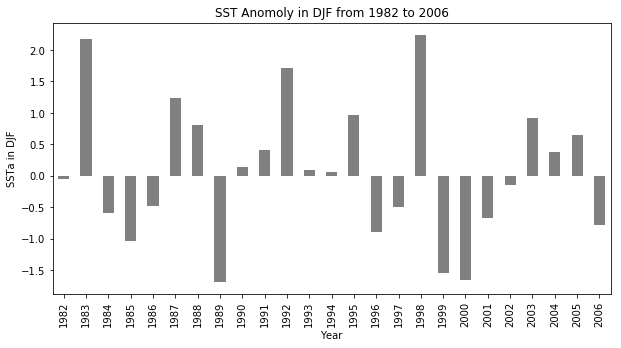

In [9]:
nina_DJF =nina34[nina34.SEAS=='DJF']

nina_DJF_ANOM = nina_DJF.ANOM
nina_DJF_ANOM.plot(kind='bar',color ='grey',figsize=(10,5),
                   title='SST Anomoly in DJF from 1982 to 2006')
plt.xlabel('Year')
plt.ylabel('SSTa in DJF')

### Open .nc data via Xarray

In [10]:
## nc file is downloaded from IRI library from GIMMS NDVI dataset
## The region selected is by lon and lat of QTP in IRI 
nd = xr.open_dataset('ndvi_QTP_IRI.nc')

Text(0.5,1,'NDVI general patterns from 1982 to 2006')

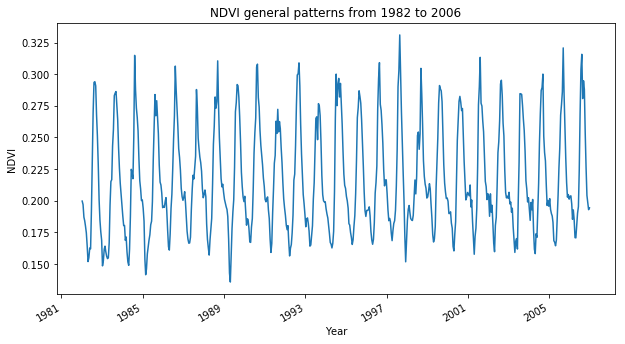

In [11]:
nd_mean = nd.mean(dim=['X','Y'])
nd_mean.ndvi.plot(figsize=(10,5))
## Have a general idea to make connection between NDVI and ENSO
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.title('NDVI general patterns from 1982 to 2006')

In [12]:
nd_mean.resample(T='1M').mean()

<xarray.Dataset>
Dimensions:  (T: 300)
Coordinates:
  * T        (T) datetime64[ns] 1982-01-31 1982-02-28 1982-03-31 1982-04-30 ...
Data variables:
    ndvi     (T) float64 0.1984 0.1857 0.1774 0.1581 0.1588 0.1773 0.2495 ...

### Extract NDVI from May to Sep and calculate the max (growing season)

In [13]:
ndvi_mon =nd_mean.resample(T='1M').mean()

## make mask for growing season 
M_Sep = (ndvi_mon['T'].dt.month>=5 )& (ndvi_mon['T'].dt.month<=9)
ndvi_mon_MS = ndvi_mon.where(M_Sep)
## According to previous study, both max or mean of NDVI make sense;
## I suppose that maximum ndvi may be more sensitive to the events of ENSO  
ndvi_season = ndvi_mon_MS.resample(T='1Y').max()

In [14]:
## Make two time series into the pandas dataframe format for further correlation analysis 
ndvi_season_pd = ndvi_season.ndvi.to_pandas()
nina_DJF_ANOM_pd = pd.DataFrame(nina_DJF_ANOM)

In [15]:
## Set ndvi as dependent and ONI as independent
y = ndvi_season_pd
X=nina_DJF_ANOM

### Use ranked correlation get better results

In [16]:
from scipy.stats import spearmanr

In [17]:
corr=spearmanr(X,y)
corr

SpearmanrResult(correlation=-0.13384615384615384, pvalue=0.5235721336415065)

The result of Spearman correlation is negative and did not pass the significance test, which may due to the small amounts of time series data. However, we cannot say that there is no response of NDVI to ENSO to some extent. Perhaps, the relationship is not in a simple linear or ranked way, but in a way that is hard to discern :(   
However, previous studies also show evidence that despite of the low correlation coefficient and sometimes didn't pass the sig test, there still can be some inherent connections that need further analysis :)

### For further analysis, we need more climate related data as support such as prcp & temp, and now it's time to load them from .mat format.

In [18]:
import scipy.io as spio

In [19]:
Prcp = spio.loadmat('array_prcp.mat')
Temp = spio.loadmat('array_temp.mat')

## When we use spio.loadmat, it is a dict structure, and so I turn them into xarray for convenience
temp=xr.DataArray(Temp['array_temp'],dims=['X','Y','T'],coords={'X':np.linspace(73,104,374),'Y':np.linspace(39,26,166)})
prcp = xr.DataArray(Prcp['array_prcp'],dims=['X','Y','T'],coords={'X':np.linspace(73,104,374),'Y':np.linspace(39,26,166)})

## Temp and Prcp data are monthly data, but with different time spans. I select the time scale from 1982 to 2006 to
## keep the same as previous data
prcp=prcp[:,:,0:300]
temp=temp[:,:,0:300]
temp

<xarray.DataArray (X: 374, Y: 166, T: 300)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * X        (X) float64 73.0 73.08 73.17 73.25 73.33 73.42 73.5 73.58 73.66 ...
  * Y        (Y) float64 39.0 38.92 38.84 38.76 38.68 38.61 38.53 38.45 ...
Dimensions without coordinates: T

In [20]:
prcp['T'] = pd.date_range('1982-01-01', '2007-01-01', freq ='M')
temp['T'] = pd.date_range('1982-01-01', '2007-01-01', freq ='M')

In [21]:
## calculate the total amount of prcp during growing season may reflect better the potential connections instead of the total year
prcp_yr = prcp.resample(T='1Y').sum(dim='T')
## make mask 
M_Sep_temp = (temp['T'].dt.month>=5 )& (temp['T'].dt.month<=9)
M_Sep_t = temp.where(M_Sep_temp)
M_Sep_temp_mean = M_Sep_t.resample(T='Y').mean(dim='T')

### Now we have prcp and temp data, but our SSTa data is just time series instead of three-dimensional data. What we need to do is to make the data structure like prcp or temp.

In [22]:
nina_DJF_ANOM_spa = np.zeros_like(prcp_yr)

nina_DJF_ANOM_spa[:,:,:]=nina_DJF_ANOM
nina_DJF_ANOM_spa = xr.DataArray(nina_DJF_ANOM_spa,dims=['X','Y','T'],
                                 coords={'X':np.linspace(73,104,374),'Y':np.linspace(39,26,166)})
nina_DJF_ANOM_spa['T'] = pd.date_range('1982-01-01', '2007-01-01', freq ='Y')

### Now it is time for spatial correlation analysis!

In [23]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

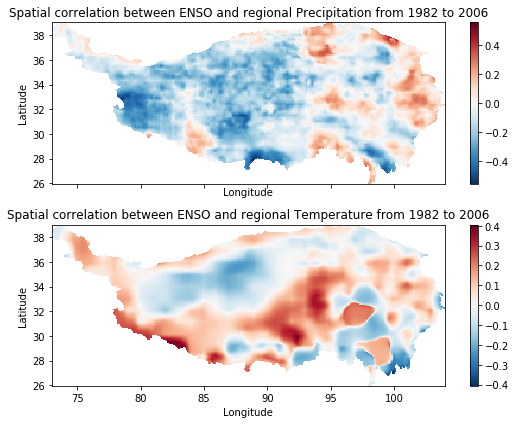

In [24]:
nino_prcp_cor = corrrelation(prcp_yr, nina_DJF_ANOM_spa,dims='T')
nino_prcp = nino_prcp_cor.transpose()
## The reason we use transpose here is due to the problem of the original .mat format data 
##(something wrong with the longitude and latitude, and we need to transpose to have the right projection for QTP) )
nino_temp_cor = corrrelation(M_Sep_temp_mean, nina_DJF_ANOM_spa,dims='T')
nino_temp= nino_temp_cor.transpose()

## Visualisation 
fig, axes = plt.subplots(nrows=2, figsize=(8, 6),sharex=True,sharey=True)
ax0,ax1=axes
nino_prcp.plot(ax=ax0)
nino_temp.plot(ax=ax1)
ax0.set_title('Spatial correlation between ENSO and regional Precipitation from 1982 to 2006')
ax0.set_xlabel('Longitude')
ax0.set_ylabel('Latitude')
ax1.set_title('Spatial correlation between ENSO and regional Temperature from 1982 to 2006')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

plt.tight_layout()

We can see that there are some relationships between ENSO and regional prcp and temp. In fact, considering the geographical conditions, very few of regions in China are influenced by ENSO. SURPRISE!
However, since we find that regional prcp and temp make responses to ENSO, and in theory, NDVI depends on both of these two natural climate factors. Next, we may try to figure out how NDVI responese to prcp and temp. 

In [25]:
nd_mon_spa=nd.resample(T='1M').mean()
## Resample NDVI in spatial scale
M_Sep_spa = (nd_mon_spa['T'].dt.month>=5 )& (nd_mon_spa['T'].dt.month<=9)
ndvi_mon_MS_spa = nd_mon_spa.where(M_Sep_spa)
ndvi_season_spa = ndvi_mon_MS_spa.resample(T='1Y').max()
ndvi_season_spa

<xarray.Dataset>
Dimensions:  (T: 25, X: 427, Y: 180)
Coordinates:
  * T        (T) datetime64[ns] 1982-12-31 1983-12-31 1984-12-31 1985-12-31 ...
  * Y        (Y) float32 25.986555 26.059282 26.13201 26.204737 26.277464 ...
  * X        (X) float32 72.98613 73.05885 73.131584 73.20431 73.27704 ...
Data variables:
    ndvi     (T, Y, X) float32 0.27850002 0.22850001 0.23050001 0.23850001 ...

In [26]:
## The resolutions of NDVI data and precipitation/ temperature data are slightly different, so we have to interpolation or downscale on of them. 
ndvi_spa = ndvi_season_spa.interp_like(prcp_yr.X,method='nearest')
ndvi_spa = ndvi_spa.interp_like(prcp_yr.Y,method='nearest')
ndvi_spa

<xarray.Dataset>
Dimensions:  (T: 25, X: 374, Y: 166)
Coordinates:
  * T        (T) datetime64[ns] 1982-12-31 1983-12-31 1984-12-31 1985-12-31 ...
  * X        (X) float64 73.0 73.08 73.17 73.25 73.33 73.42 73.5 73.58 73.66 ...
  * Y        (Y) float64 39.0 38.92 38.84 38.76 38.68 38.61 38.53 38.45 ...
Data variables:
    ndvi     (T, Y, X) float32 0.116500005 0.13050002 0.115 0.1075 ...

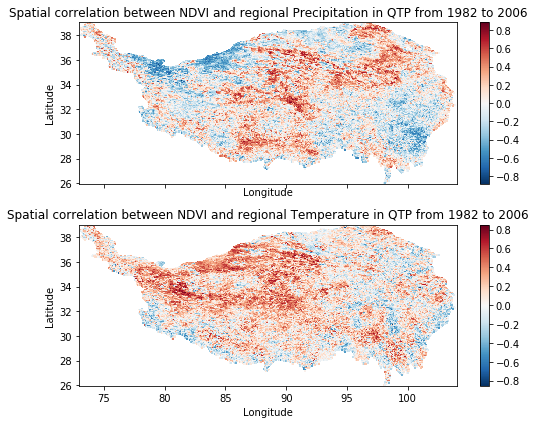

In [27]:
prcp_ndvi_cor = corrrelation(ndvi_spa.ndvi,prcp_yr,dims='T')
temp_ndvi_cor = corrrelation(ndvi_spa.ndvi,M_Sep_temp_mean,dims='T')
prcp_ndvi = prcp_ndvi_cor
temp_ndvi = temp_ndvi_cor

## Visualisation 
fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex= True, sharey=True)
ax2,ax3=axes
prcp_ndvi.plot(ax=ax2)
temp_ndvi.plot(ax=ax3)

ax2.set_title('Spatial correlation between NDVI and regional Precipitation in QTP from 1982 to 2006')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax3.set_title('Spatial correlation between NDVI and regional Temperature in QTP from 1982 to 2006')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')

plt.tight_layout()


### Finally, time to directly see the potential relationship between ENSO and NDVI!

Text(0.5,1,'Spatial correlation between ENSO and NDVI in QTP from 1982 to 2006')

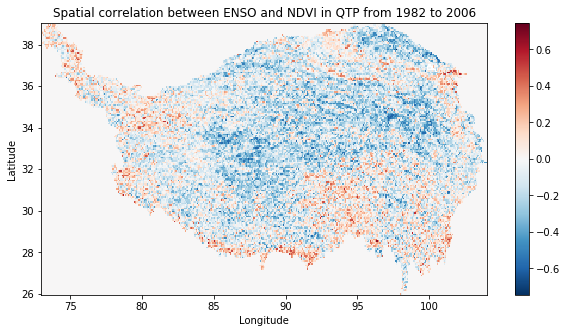

In [28]:
nino_ndvi_cor = corrrelation(ndvi_spa.ndvi, nina_DJF_ANOM_spa,dims='T')
nino_ndvi = nino_ndvi_cor.transpose()
##define a mask to get the area of QT Plateau alone
mask = prcp_yr[:,:,0].values ==0
## correlation between NDVI in growing season and Nino3.4 in winter (DJF)
nino_ndvi_mask=(nino_ndvi-nino_ndvi*mask).transpose()
nino_ndvi_mask.plot(figsize=(10,5))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial correlation between ENSO and NDVI in QTP from 1982 to 2006')

#### 1) There are some responses of NDVI to ENSO, the interannual variations, and these reponses have geographical divergence.
#### 2) It should not be a simple linear regression or even spearman ranked correlation between NDVI and ENSO. However, it is difficult to describe its inherent non-linear feedback without a clear understanding of its mechanisms. But I am working on it and hope to real find something in the future!
#### 3) There are still a lot unanswered questions and caveats that did not being coped with well such as the time lag, the seasonal divergence and etc in this project. 